## 卡尔曼滤波从小白到入门

我们重最简单的传感器开始，假设你有一个体重秤，但是它存在一定的误差范围，就像这样

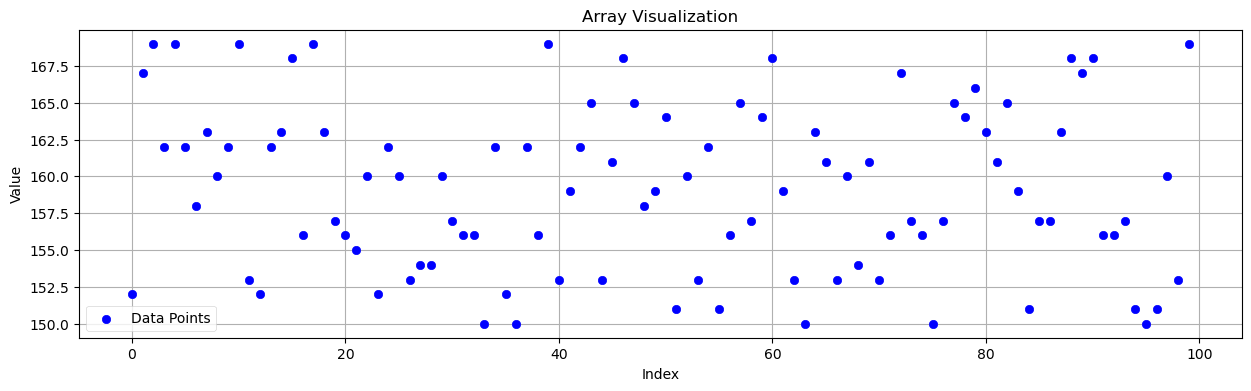

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据
mean = 160      # 均值为100
data = mean + np.random.randint(-10, 10, size=100)

# 使用matplotlib进行可视化
plt.scatter(range(len(data)), data, color='b', label='Data Points')
plt.title('Array Visualization')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

我们可以多次测量求平均值

In [225]:
# 计算数组的平均值
mean_value = np.mean(data)
print("mean of data:", mean_value)

mean of data: 159.13


但如果这个值并不是静止的，而是随时间变化，比如说你每天测量一次体重，并且你的体重随时间增加

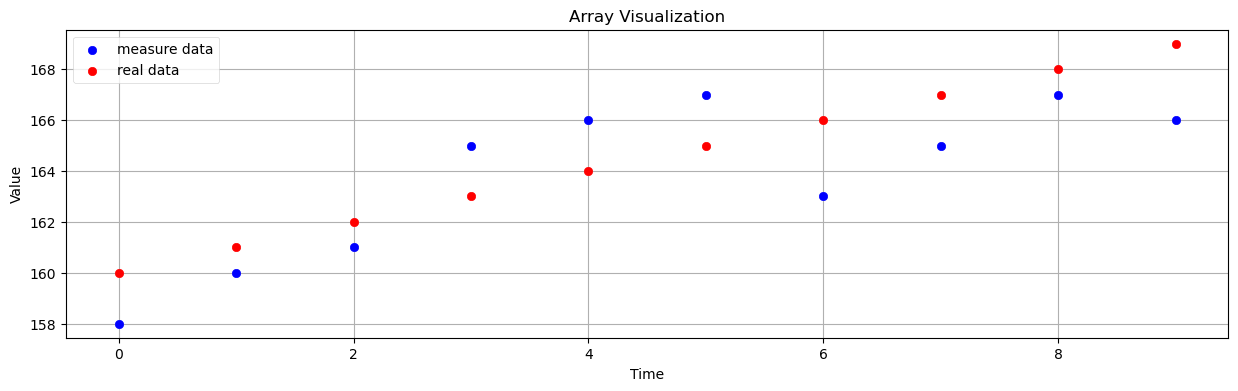

In [226]:
time = np.arange(0, 10)
data = np.arange(160, 170)  # 生成1到10的数组
measure_data = data + np.random.randint(-3, 3, size=10)

# 使用matplotlib进行可视化
plt.scatter(time, measure_data, color='b', label='measure data')
plt.scatter(time, data, color='r', label='real data')
plt.title('Array Visualization')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [227]:
# 计算数组的平均值
mean_value = np.mean(data)
print("mean of data:", mean_value)

mean of data: 164.5


有一种方法为最小二乘拟合，这属于一种优化的方法

最小二乘拟合是一种常见的数据拟合方法，用于找到一条最符合给定数据的直线（或曲线）。它的目标是找到一个函数，使得该函数的预测值与实际观测值之间的残差平方和最小。

在最小二乘拟合中，我们通常使用一个已知的函数形式（比如线性函数、多项式函数等）来拟合数据。对于线性函数来说，我们的目标是找到一条直线 y = mx + b，使得所有数据点到这条直线的距离之和最小。
具体来说，对于给定的数据点 (x1, y1), (x2, y2), ..., (xn, yn)，我们希望找到一组参数 m 和 b，使得下面的残差平方和最小：
[ \sum_{i=1}^{n} (y_i - (mx_i + b))^2 ]

为了找到最小二乘拟合的参数，我们可以使用各种优化算法，比如梯度下降法、最小二乘法等。在实际应用中，通常会使用现成的工具库来进行最小二乘拟合，比如NumPy和SciPy中的函数。
最小二乘拟合在实际中有着广泛的应用，比如在回归分析、数据建模、信号处理等领域。它是一种简单而有效的拟合方法，可以帮助我们理解数据的趋势和规律。

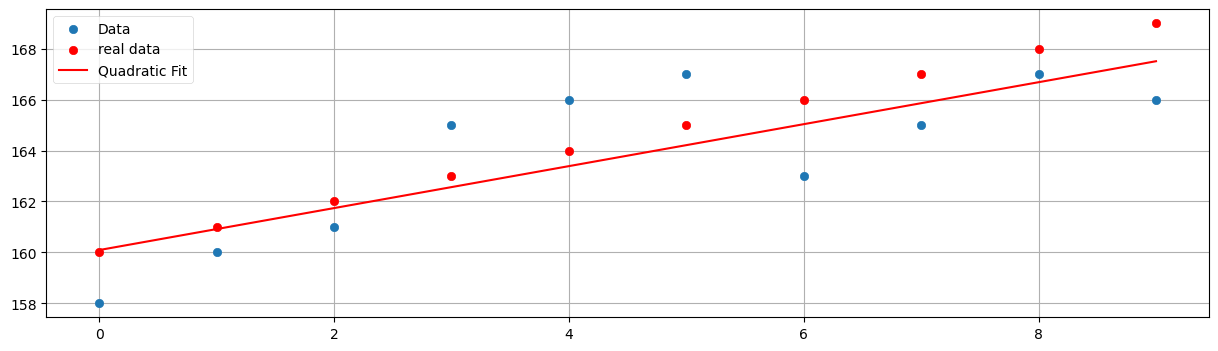

In [228]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# 定义要拟合的函数形式
def quadratic_function(x, a, b):
    return a * x + b

# 使用curve_fit函数拟合曲线
params, covariance = curve_fit(quadratic_function, time, measure_data)

# 绘制原始数据和拟合的曲线
plt.scatter(time, measure_data, label='Data')
plt.scatter(time, data, color='r', label='real data')
plt.plot(time, quadratic_function(time, *params), color='red', label='Quadratic Fit')
plt.legend()
plt.show()


优化的方法是一个涉及范围与知识比较多的一个学科，不在今天讨论范围内，我们先回到滤波

有些情况我们并不能提前知道明天的测量结果是多少，只能根据以前的数据来计算当前的数据，我们如何得到一个更好地当前状态的估计呢，如果可以有另一个传感器，我们就可以用两个传感器求平均了，传感器越多，求平均的结果理论上就越准。

但我们不能无限增加传感器，有没有不用增加传感器的方法

如果我们预先知道体重会每天增加1，就可以根据上一次数据得到一个预测值

        prediction = last_estimate +1

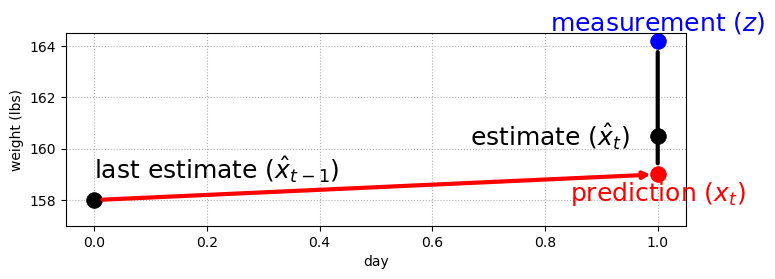

In [229]:
gh.plot_estimate_chart_3()

$$\mathtt{estimate} = \mathtt{prediction} + \frac{4}{10}(\mathtt{measurement} - \mathtt{prediction})$$

In [230]:
#format the book
import book_format
book_format.set_style()
import kf_book.gh_internal as gh

from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

# weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
#            169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
weights = measure_data

time_step = 1.0  # day
scale_factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):     
    # storage for the filtered results
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements
    for z in weights: 
        # predict new position
        predicted_weight = estimated_weight + gain_rate * time_step

        # update filter 
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)

    return estimates, predictions

initial_estimate = 160.
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True)    

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 160.48
previous estimate: 160.48, prediction: 161.48, estimate 161.29
previous estimate: 161.29, prediction: 162.29, estimate 163.37
previous estimate: 163.37, prediction: 164.37, estimate 165.02
previous estimate: 165.02, prediction: 166.02, estimate 166.41
previous estimate: 166.41, prediction: 167.41, estimate 165.65
previous estimate: 165.65, prediction: 166.65, estimate 165.99
previous estimate: 165.99, prediction: 166.99, estimate 166.99
previous estimate: 166.99, prediction: 167.99, estimate 167.20


array([158, 160, 161, 165, 166, 167, 163, 165, 167, 166])

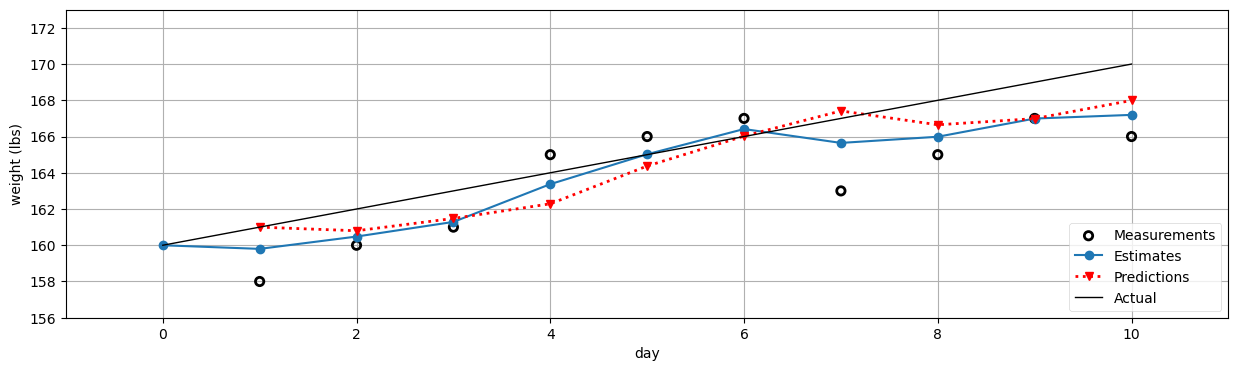

In [231]:
# plot results
import kf_book.book_plots as book_plots
book_plots.set_figsize(15)
gh.plot_gh_results(weights, estimates, predictions, [160, 170])
weights

但是如果我们以为体重会每天减少1，但实际上是增加，会怎么样

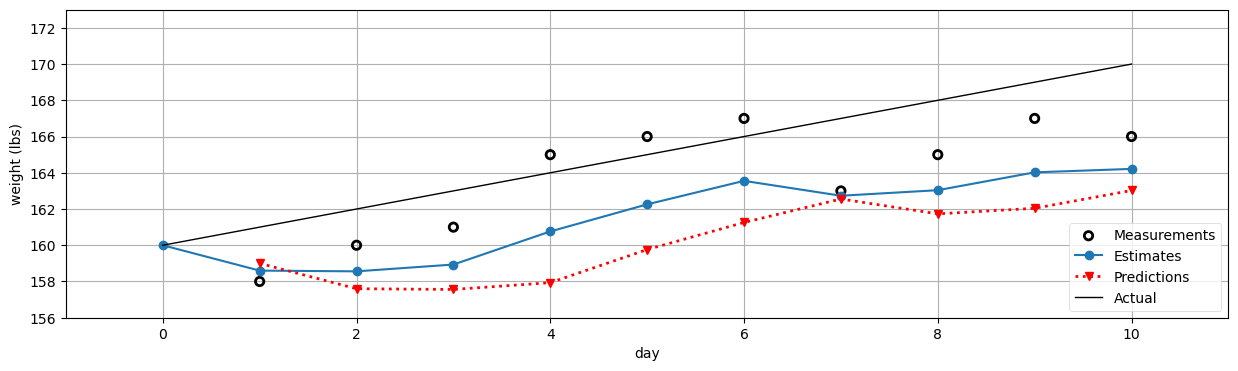

In [232]:
e, p = predict_using_gain_guess(initial_estimate, -1.)
gh.plot_gh_results(weights, e, p, [160, 170])

所以如果我们用于预测当前数据的“模型”，或者说状态转移方程是错误的，得到的结果会非常离谱

我们能否让他自动得到这个预测的数值，比如说假设体重均匀增加，计算出增加的速度

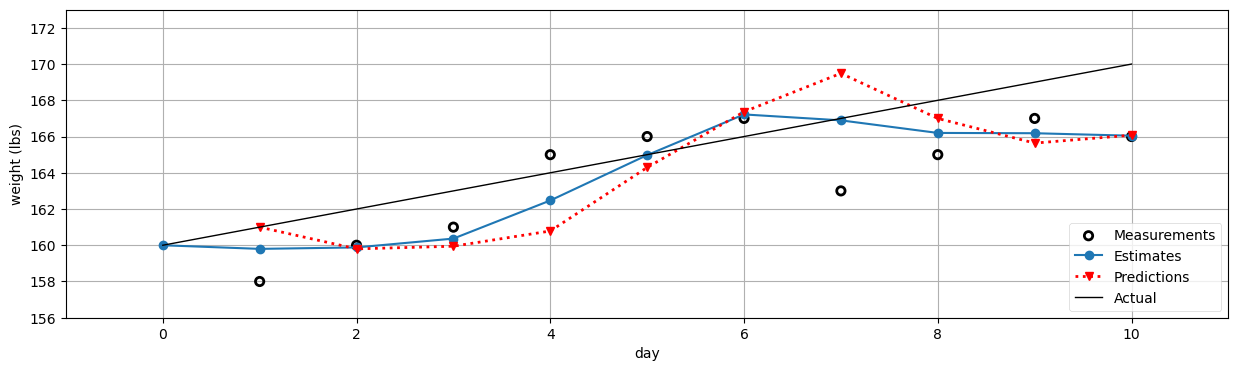

In [233]:
weight = 160.  # initial guess
gain_rate = 1.0  # initial guess

time_step = 1.
weight_scale = 4./10    #g
gain_scale = 1./3   #h
estimates = [weight]
predictions = []

for z in weights:
    # prediction step   预测
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
    
    # update step    更新
    residual = z - weight
    
    gain_rate =  gain_rate + gain_scale   * (residual/time_step)     #更新预测速率
    weight    = weight    + weight_scale * residual     
  
    estimates.append(weight)

gh.plot_gh_results(weights, estimates, predictions, [160, 170])